# Tensor Board

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

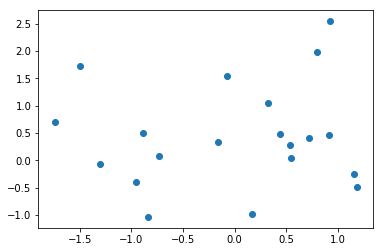

In [5]:
#  show graph on jupyter notebook
%matplotlib inline 
a = tf.random_normal([2, 20])
sess = tf.Session()
out = sess.run(a)
x, y = out

plt.scatter(x, y)
plt.show()

In [2]:
a = tf.constant(5, name="input_a")
b = tf.constant(3, name="input_b")
c = tf.multiply(a, b, name="mul_c")
d = tf.subtract(b, 1, name="sub_d")
e = tf.multiply(c,d, name="mul_e")
sess = tf.Session()
output = sess.run(e)
print (output)
writer = tf.summary.FileWriter('./my_graph', sess.graph)
sess.close()

30


# Tensor Shape

In [8]:
tensor_0 = 1
print ("tensor_0 = ", tf.shape(tensor_0))

tensor_1 = np.array(["a", "b", "c"])
print ("tensor_1 = ", tf.shape(tensor_1))

tensor_2 = np.array([
                     ["a", "b", "c"],
                     ["d", "e", "f"]
                    ])
print ("tensor_2 = ", tf.shape(tensor_2))

tensor_3 = np.array([
                     [
                      ["a", "b"], ["c", "d"]
                     ],
                     [
                      ["a", "b"], ["c", "d"]
                     ]
                    ])
print ("tensor_3 = ", tf.shape(tensor_3))



t = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
print(t.ndim) # rank
print(t.shape) # shape


tensor_0 =  Tensor("Shape_34:0", shape=(0,), dtype=int32)
tensor_1 =  Tensor("Shape_35:0", shape=(1,), dtype=int32)
tensor_2 =  Tensor("Shape_36:0", shape=(2,), dtype=int32)
tensor_3 =  Tensor("Shape_37:0", shape=(3,), dtype=int32)
2
(4, 3)


# NameScope

In [5]:
import tensorflow as tf

with tf.name_scope("Scope_A"):
    a = tf.add(1, 2, name="A_add")
    b = tf.multiply(a, 3, name="A_mul")

with tf.name_scope("Scope_B"):
    c = tf.add(4, 5, name="B_add")
    d = tf.multiply(c, 6, name="B_mul")

e = tf.add(b, d, name="output")
writer = tf.summary.FileWriter('./my_graph', sess.graph)
writer.close()

In [11]:
print(tf.__version__)

1.4.0


# 변수 저장

In [4]:
# feed_dict
# 실행시에 값을 대체하는 방식
a = tf.add(2,5)
b = tf.multiply(a, 3)

replace_dict = {a: 10}

sess = tf.Session()
sess.run(b, feed_dict=replace_dict)

30

In [24]:
# placeholder
# 사용자가 입력하는 값을 받을 수 있는 변수 정의
a = tf.placeholder(tf.int32, shape=[2], name="my_input")

b = tf.reduce_prod(a, name="prod_b")
c = tf.reduce_sum(a,name="sum_c")

d = tf.add(b, c, name="add_b")

sess = tf.Session()
input_dict = {a: np.array([5, 3], dtype=np.int32)}

sess.run(d, feed_dict=input_dict)
# (3*15) + (3+8) = 23

23

In [26]:
# Variable
# Tensor와 Operation은 변경이 불가함.
my_var = tf.Variable(3, name="my_variable")

# operation을 변수로 지정
add = tf.add(5, my_var)
mul = tf.multiply(8, my_var)

# 변수 초기화
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [27]:
# 변수값 변경
my_var = tf.Variable(1)
my_var_times_two = my_var.assign(my_var*2)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
sess.run(my_var_times_two)

2

# one hot

In [9]:
tf.one_hot([[0], [1], [2], [0]], depth=3).eval()

array([[[ 1.,  0.,  0.]],

       [[ 0.,  1.,  0.]],

       [[ 0.,  0.,  1.]],

       [[ 1.,  0.,  0.]]], dtype=float32)

In [10]:
t = tf.one_hot([[0], [1], [2], [0]], depth=3)
tf.reshape(t, shape=[-1, 3]).eval()

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.]], dtype=float32)